# Guided Project: Finding the Best Markets to Adverstise In 

For this particular project, the goal is to incorporate the necessary data analysis of finding the two best markets to advertise a product for a particular e-learning company offering courses on programming. Therefore, in order to see where the investment of advertisement should be put towards to, I will use the skills I have learned so far. The skills that we will apply towards this project include: 

   1) Summarizing distributions using the mean, median and mode
   
   2) Measuring the variablity of a distribution using the range,
      mean absolute deviation, variance, and the standard deviation
    
   3) Locating any value in a distribution using z-scores. 
   


## Understanding the Data 

To achieve this goal, I could conduct surveys for different markets to find out which one would be the best to advertise for. However, there are cost limitations, and this would be costly, and I would therefore like to take a less costly approach towards this project. I will try to look for existing data that is related for the purpose of this project. The dataset I will use is freeCodeCamp's 2017 New Coder Survey because it is readily available. On the contrary of downloading the csv file, I downloaded directly from the link to avoid the dtypes warning error and also set low memory to 0 to avoid the error as well. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
df = pd.read_csv(direct_link, low_memory = 0) 

print(df.shape)
df.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the ouput, it seems that there are many columns with NaN values. Also, there are 18,175 rows and 136 columns from the output. Let's move onto the next step to check for sample representativity. 

## Checking for Sample Representativity

For the courses that are offered in programming, it is leaned more towards web and mobile development, but there are other genres and domains covered as well such as data science, game development, and more. I wanted to find answers for a population of new coders that are interested in these programs. I wanted to know: 
    
   1) Where the new coders were located?
    
   2) Which location has the highest number of new coders?
   
   3) The amount of money new coders are willing to pay for this 
      particular skill. 
      
I first need to check though if the sample is representative of the population. 

In [2]:
freq_table = df['JobRoleInterest'].value_counts(normalize = True) * 100
freq_table.head()


Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Name: JobRoleInterest, dtype: float64

In [3]:
drop = df['JobRoleInterest'].dropna()
splitted_interests = drop.str.split(',')
options = splitted_interests.apply(lambda x: len(x))
options.value_counts(normalize = True).sort_index() * 100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From this, it is apparent that only 31.7% have an idea of which programming area they are interested in. As shown, it can be seen that most students are interested in web and mobile development. 


True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


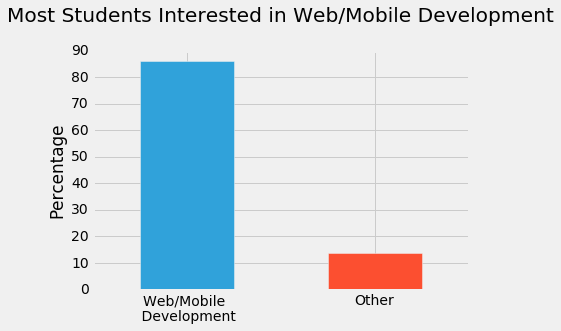

In [4]:
web_mobile = drop.str.contains('Web Developer|Mobile Developer')
web_mobile_freq = web_mobile.value_counts(normalize = True) * 100
plt.style.use('fivethirtyeight')
web_mobile_freq.plot.bar()
plt.title('Most Students Interested in Web/Mobile Development', y = 1.1)
plt.ylabel('Percentage')
plt.xticks([0,1], ['Web/Mobile \n Development', 'Other'], rotation = 0)
print(web_mobile_freq)

From the graph and the printed data, it is apparent that 86.24% of students are interested in Web/Mobile Development and 13.76% of students are interested in other classes.

## New Codes - Locations and Densities 

In [5]:
df = df[df['JobRoleInterest'].notnull()].copy()
print(df['CountryLive'].value_counts().head())
print('\n')
df['CountryLive'].value_counts(normalize = True).head() * 100

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64




United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

From the frequency tables, it appears that the United States of America has a significantly larger number of users who actually live in the US compared to the other users from other countries. 

## Spending Money for Learning 

From the MoneyForLearning column describes in American dollars the amount of money spent by the students from the start of coding until the end of the survey. At a selling price of $59, I am very much interested in knowing how much money each student spends every month. I will also narrow down the countries to US, India, United Kingdom and Canada. The reason for this decision is because they have the highest absolute frequencies in the sample, and english is a language used in all those countries. 

In [6]:
df['MonthsProgramming'].replace(0,1, inplace = True)
df['Money Spent Per Month'] = df['MoneyForLearning'] / df['MonthsProgramming']
df['Money Spent Per Month'].isnull().sum()
df = df[df['Money Spent Per Month'].notnull()]
df = df[df['CountryLive'].notnull()]
df['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [7]:
df_mean = df.groupby('CountryLive').mean()
df_mean['Money Spent Per Month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Money Spent Per Month, dtype: float64

From the data shown, it is surprising how the mean values for India and Canada both exceed the United Kingdom by a significant amount. This is surprising because from a socioeconomic standpoint, the UK is known to also invest a good amount of money into its education. 

## Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



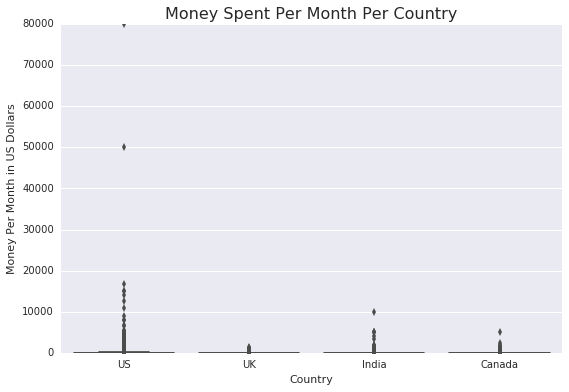

In [8]:
import seaborn as sns 
four_countries = df[df['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x = 'CountryLive', y = 'Money Spent Per Month', data = four_countries)
plt.title('Money Spent Per Month Per Country', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money Per Month in US Dollars')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

From the data, it is not exactly clear and can be hard to read. I will filter the data to see and get a better picture. Also, there seems to be one outlier that is present in this dataset. I will filter the money spent per month to be less than 20000 and see where it goes from there. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



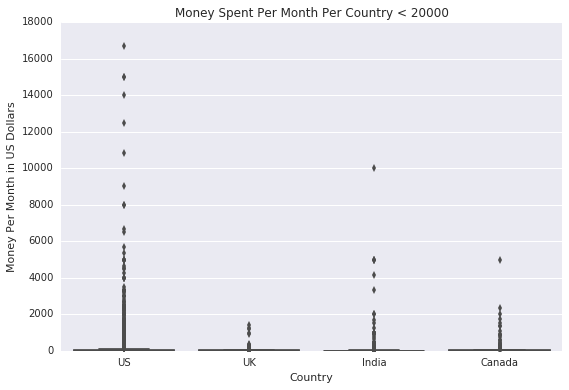

In [9]:
df = df[df['Money Spent Per Month'] < 20000]
countries_mean = df.groupby('CountryLive').mean()
countries_mean['Money Spent Per Month'][['United States of America', 'United Kingdom', 'India', 'Canada']]
four_countries_updated = df[df['CountryLive'].str.contains('United States of America|United Kingdom|India|Canada')]
sns.boxplot(x = 'CountryLive', y = 'Money Spent Per Month', data = four_countries_updated)
plt.title('Money Spent Per Month Per Country < 20000')
plt.xlabel('Country')
plt.ylabel('Money Per Month in US Dollars')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

From this update in the data, it is a bit clearer to see that there are outliers for the US, India and Canada. Let's see these outliers. 

In [10]:
india_outliers = four_countries_updated[(four_countries_updated['Money Spent Per Month'] >= 2500) & (four_countries_updated['CountryLive'] == 'India')]
print(india_outliers)
four_countries_updated = four_countries_updated.drop(india_outliers.index)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more 

In [11]:
us_outliers = four_countries_updated[(four_countries_updated['CountryLive'] == 'United States of America') & (four_countries_updated['Money Spent Per Month'] > 6000)]
print(us_outliers)
four_countries_updated = four_countries_updated.drop(us_outliers.index)
four_countries_updated.head()

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard  

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent Per Month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667


From viewing the 6 outliers from India and the 11 outliers from the US, it seems that 6 people attended bootcamps for the US and it's hard to tell for the other 5, very difficult to tell what they were spending their money on. I will filter out now people who spent greater than or equal to 6000, did not attend a bootcamp, and has three months or less of programming experience.

In [12]:
no_bootcamp = four_countries_updated[(four_countries_updated['CountryLive'] == 'United States of America') & (four_countries_updated['Money Spent Per Month'] >= 6000) & (four_countries_updated['AttendedBootcamp'] == 0)]
four_countries_updated = four_countries_updated.drop(no_bootcamp.index)
less_than_3_months_coding = four_countries_updated[(four_countries_updated['CountryLive'] == 'United States of America') & (four_countries_updated['Money Spent Per Month'] >= 6000) & (four_countries_updated['MonthsProgramming'] <= 3)]
four_countries_updated = four_countries_updated.drop(less_than_3_months_coding.index)
canada_outliers = four_countries_updated[(four_countries_updated['CountryLive'] == 'Canada') & (four_countries_updated['Money Spent Per Month'] > 4500)]
canada_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent Per Month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


After filtering through more of the data, I finally found that there is only one outlier for Canada. So, let me drop it from the dataframe, proceed to calculate the mean by country and recreate the boxplot.

In [13]:
four_countries_updated = four_countries_updated.drop(canada_outliers.index)
four_countries_updated.groupby('CountryLive').mean()['Money Spent Per Month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Money Spent Per Month, dtype: float64

Now, let's proceed to make a boxplot of the data. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



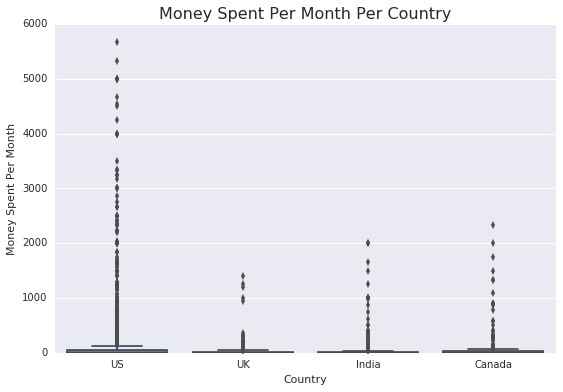

In [18]:
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'Money Spent Per Month', data = four_countries_updated)
plt.title('Money Spent Per Month Per Country', fontsize = 16)
plt.xlabel('Country')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets

As we can see in the table below, it seems that in the US, new coders who live there pay roughly about 143 dollars. I sell the program at 59 dollars, it is apparent that I should advertise in Canada, US and maybe India. However, I should not advertise in the UK because they pay roughly about 45 dollars. I will still check India though because it is a small difference in increase compared to the 59 dollar price.

In [19]:
four_countries_updated['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

From the analysis and table shown, the best two markets to advertise in are United States and India. However, it could also be US and Canada because India and canada are quite close to one another. 

## Conclusion

In this project, I surveyed data from new coders to see which two markets are the best to advertise in. The only definitive answer was to advertise in the US for sure while the rest are a bit up in the air. 